In [13]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

1.

In [5]:
iris = load_iris()

# Miramos qué contiene el objeto iris
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


2.

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [7]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

3.

In [9]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Ver tamaños
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


4.

In [12]:
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)

# por último aquí entrenamos el modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#En este código se evalúa la exactitud del modelo, que es perfecta al parecer

Accuracy: 1.0


5.

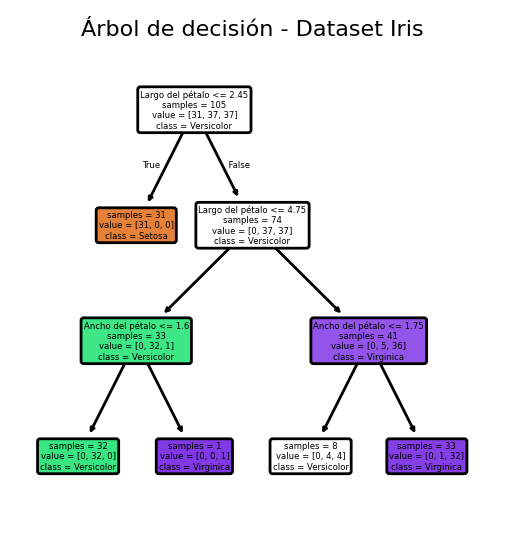

In [16]:
plt.figure(figsize=(3, 3), dpi=200)

tree.plot_tree(
    clf,
    feature_names=[
        "Largo del sépalo",
        "Ancho del sépalo",
        "Largo del pétalo",
        "Ancho del pétalo"
    ],
    class_names=[
        "Setosa",
        "Versicolor",
        "Virginica"
    ],
    filled=True,
    rounded=True,
    impurity=False
)

plt.title("Árbol de decisión - Dataset Iris", fontsize=8)
plt.show()


El gráfico del punto 5 representa visualmente cómo el árbol de decisión toma decisiones para clasificar las flores del Iris dataset. Cada bloque del gráfico es un nodo que contiene una pregunta basada en una característica del conjunto de datos, por ejemplo el largo o ancho del pétalo o del sépalo. A partir de esa pregunta, el árbol se divide en ramas que indican las posibles respuestas, guiando el proceso de clasificación paso a paso. Los colores de los nodos muestran cuál es la especie predominante en cada decisión, mientras que los nodos finales (hojas) representan la clase que el modelo predice. En conjunto, este gráfico permite entender de forma clara e intuitiva cómo el modelo llega a una decisión, mostrando qué características son más importantes y en qué orden se utilizan para clasificar las flores.

6.

In [17]:
clf.feature_importances_


array([0.        , 0.        , 0.92510833, 0.07489167])

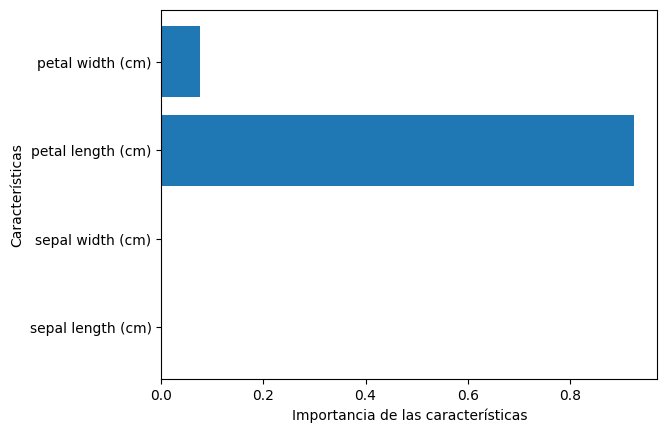

In [21]:
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

7.

/tmp/ipython-input-1482062056.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-1482062056.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-1482062056.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-1482062056.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-1482062056.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


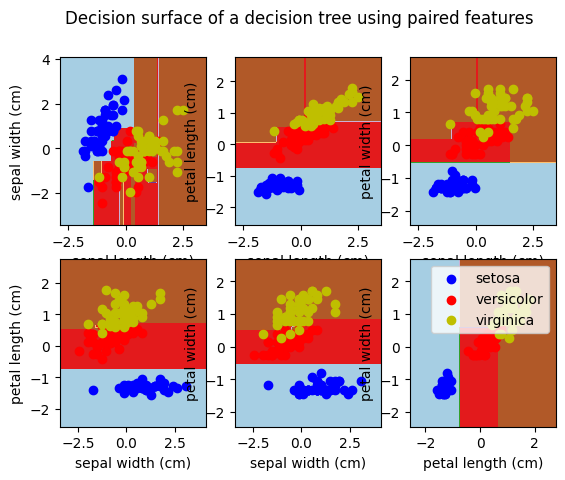

In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

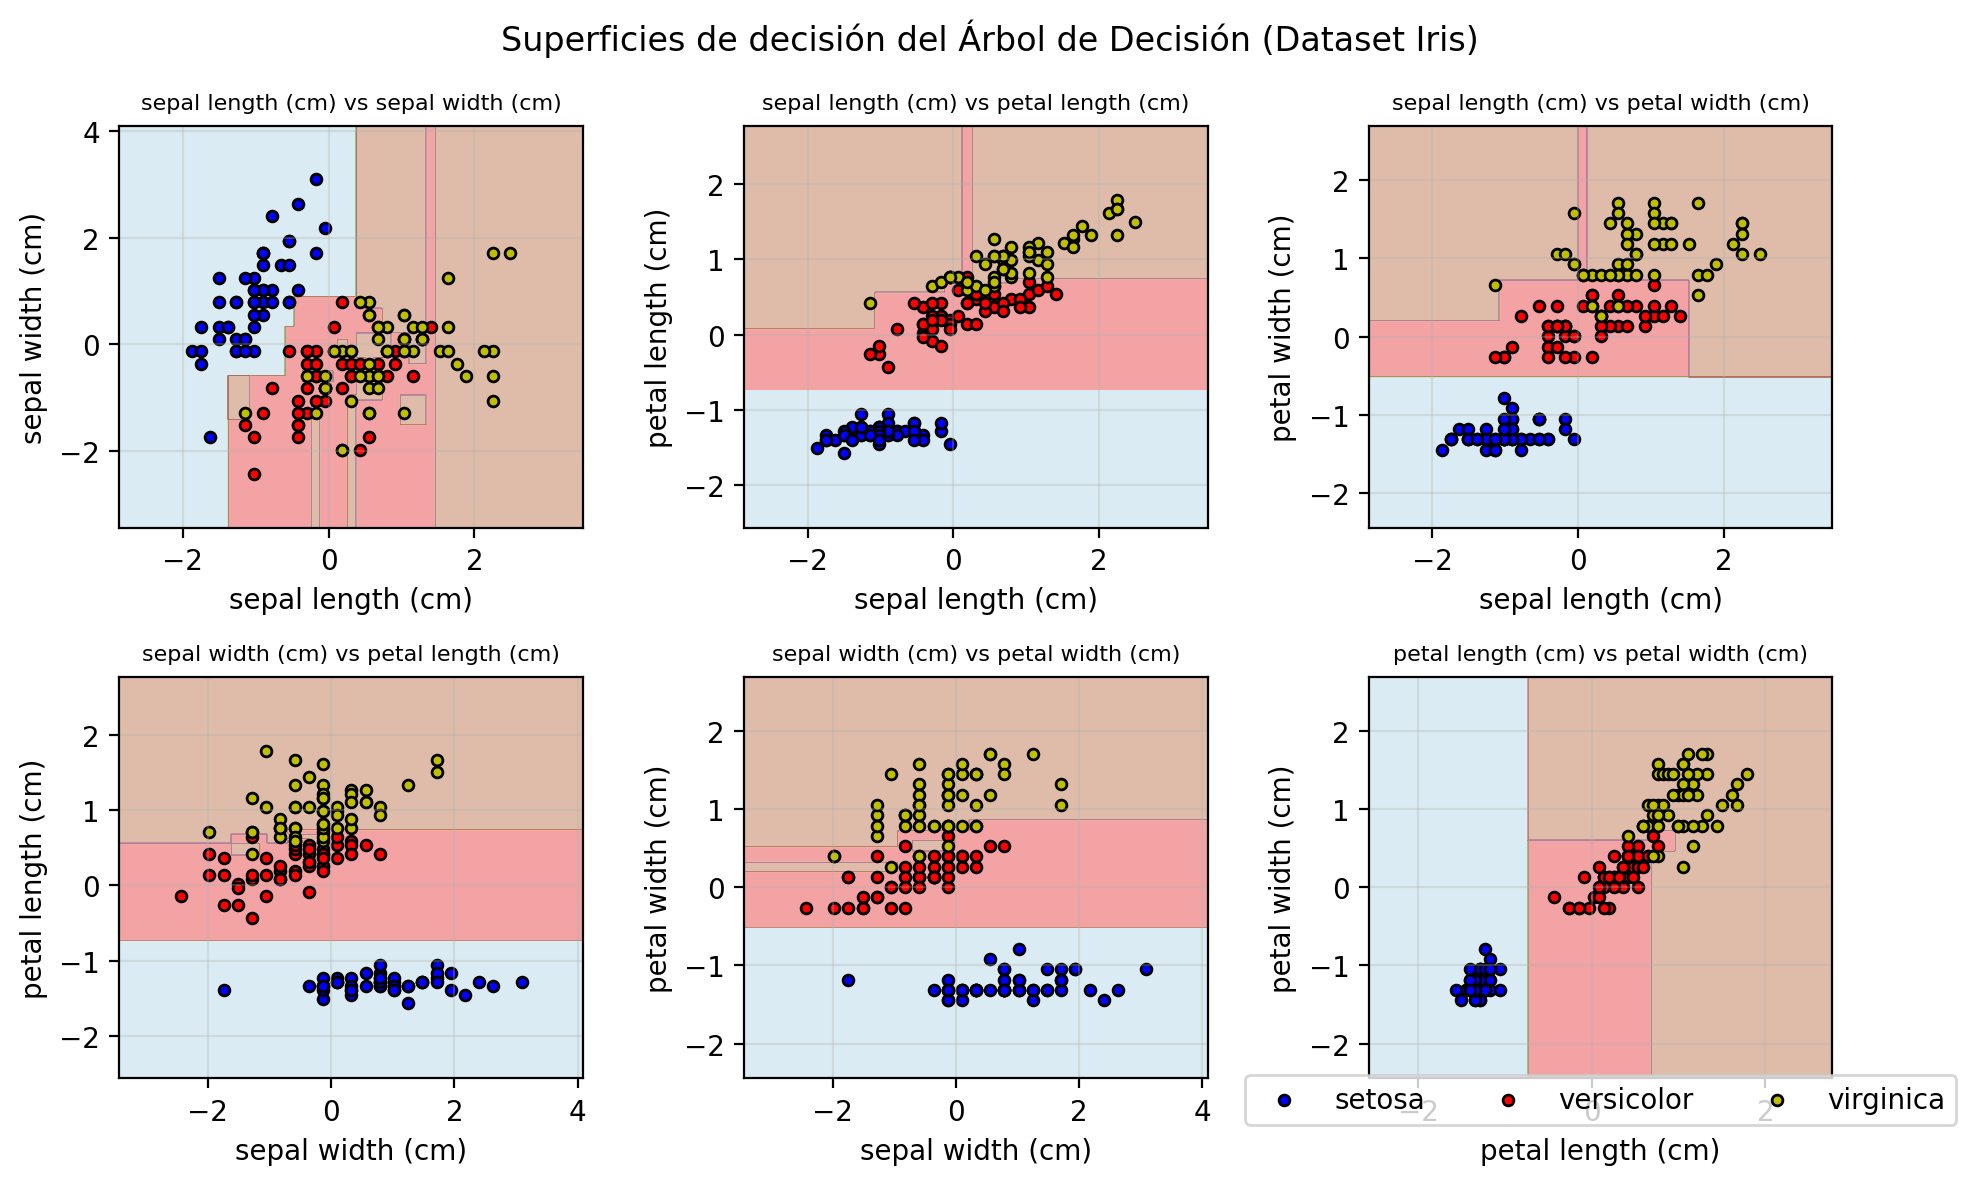

In [23]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

iris = load_iris()

plt.figure(figsize=(10, 6), dpi=200)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):

    X = iris.data[:, pair]
    y = iris.target

    # Mezclar los datos
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Estandarización
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # Entrenamiento
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X, y)

    # Subgráfico
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Regiones de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)

    # Puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="k",
            s=15
        )

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.title(
        f"{iris.feature_names[pair[0]]} vs {iris.feature_names[pair[1]]}",
        fontsize=8
    )
    plt.grid(alpha=0.3)
    plt.axis("tight")

plt.suptitle(
    "Superficies de decisión del Árbol de Decisión (Dataset Iris)",
    fontsize=12
)

plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)

plt.tight_layout()
plt.show()

El gráfico final muestra las superficies de decisión generadas por un árbol de decisión al utilizar pares de características del dataset Iris. Cada subgráfico representa cómo el modelo separa las tres especies de flores cuando solo se consideran dos variables a la vez, permitiendo visualizar de forma clara qué tan bien dichas características discriminan entre clases. Las regiones coloreadas indican la clase que el modelo predice en cada zona del espacio, mientras que los puntos corresponden a las observaciones reales del conjunto de datos. Este análisis visual complementa al árbol de decisión tradicional, ya que permite entender la capacidad del modelo para crear fronteras de decisión no lineales y observar qué combinaciones de características resultan más efectivas para la clasificación de las especies de Iris.